In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("ai_job_dataset.csv")
print("Ukuran dataset:", df.shape)
df.head()

Ukuran dataset: (15000, 19)


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [3]:
#Informasi tipe data dan missing values
df.info()

#Statistik deskriptif untuk kolom numerik
df.describe()

#Cek nilai unik dari beberapa kolom penting
df['job_title'].value_counts().head(10)
df['experience_level'].value_counts()
df['education_required'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

education_required
Bachelor     3789
Associate    3785
Master       3748
PhD          3678
Name: count, dtype: int64

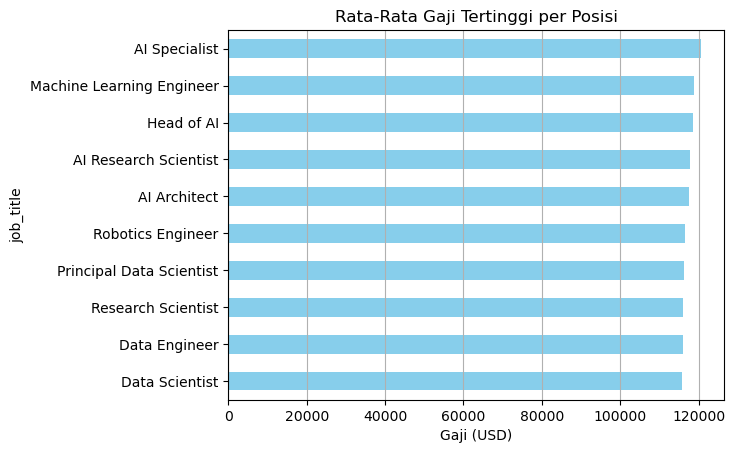

In [5]:
#Rata-rata gaji per job title (Top 10)
avg_salary_by_job = df.groupby("job_title")["salary_usd"].mean().sort_values(ascending=False).head(10)

avg_salary_by_job.plot(kind="barh", color="skyblue")
plt.title("Rata-Rata Gaji Tertinggi per Posisi")
plt.xlabel("Gaji (USD)")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12400\1579113794.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="experience_level", y="salary_usd", data=df, palette="Set2")


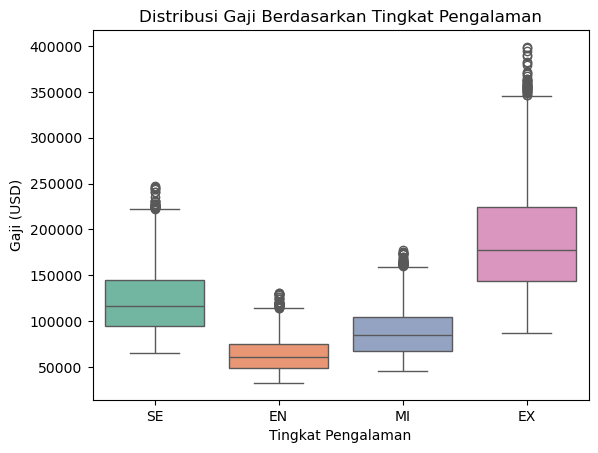

In [9]:
#Distribusi tingkat pengalaman vs gaji
sns.boxplot(x="experience_level", y="salary_usd", data=df, palette="Set2")
plt.title("Distribusi Gaji Berdasarkan Tingkat Pengalaman")
plt.xlabel("Tingkat Pengalaman")
plt.ylabel("Gaji (USD)")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12400\1256258396.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(skills), palette="mako")


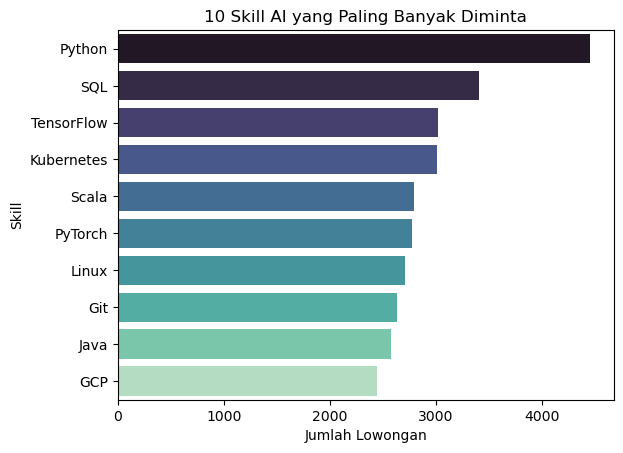

In [10]:
#Skill yang Paling Banyak Diminta
from collections import Counter

#Gabungkan semua skill ke dalam satu list
all_skills = []
df['required_skills'].str.split(', ').apply(all_skills.extend)

#Ambil 10 skill paling populer
skill_counts = Counter(all_skills).most_common(10)

#Visualisasi
skills, counts = zip(*skill_counts)
sns.barplot(x=list(counts), y=list(skills), palette="mako")
plt.title("10 Skill AI yang Paling Banyak Diminta")
plt.xlabel("Jumlah Lowongan")
plt.ylabel("Skill")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12400\3711545317.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="remote_ratio", data=df, palette="coolwarm")


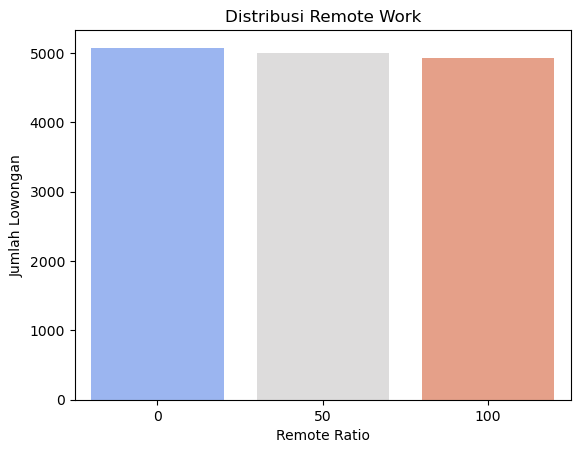

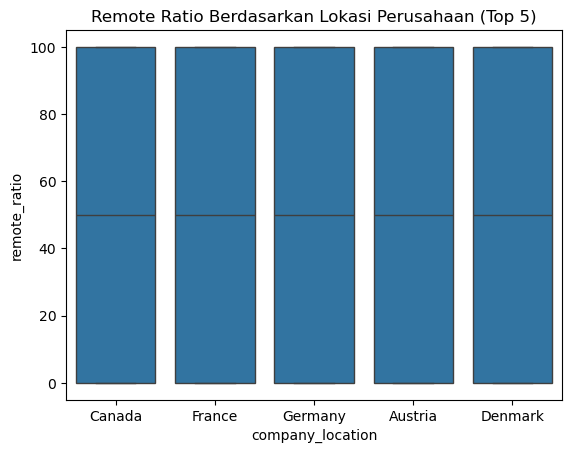

In [11]:
#Remote Work dan Lokasi
#Distribusi remote ratio
sns.countplot(x="remote_ratio", data=df, palette="coolwarm")
plt.title("Distribusi Remote Work")
plt.xlabel("Remote Ratio")
plt.ylabel("Jumlah Lowongan")
plt.show()

#Remote work berdasarkan lokasi perusahaan
top_locations = df['company_location'].value_counts().head(5).index
sns.boxplot(x="company_location", y="remote_ratio", data=df[df['company_location'].isin(top_locations)])
plt.title("Remote Ratio Berdasarkan Lokasi Perusahaan (Top 5)")
plt.show()